In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

bgg_Category = pd.read_csv('scraped/bgg_Category.csv')
bgg_GameFamily = pd.read_csv('scraped/bgg_GameFamily.csv')
bgg_GameItem = pd.read_csv('scraped/bgg_GameItem.csv')
bgg_GameType = pd.read_csv('scraped/bgg_GameType.csv')
bgg_Mechanic = pd.read_csv('scraped/bgg_Mechanic.csv')
bgg_Person = pd.read_csv('scraped/bgg_Person.csv')
bgg_Publisher = pd.read_csv('scraped/bgg_Publisher.csv')

In [16]:
core = [
'year',
'name',
'bgg_id',
'designer',
'mechanic',
]
response = [
'num_votes',
'avg_rating',
'stddev_rating',
'bayes_rating',
]
actor_covariates = [

]
game_covariates = [
'complexity',
'game_type',
'publisher',
'min_players',
'max_players',
'min_players_rec',
'max_players_rec',
'min_players_best',
'max_players_best',
'min_age',
'min_age_rec',
'min_time',
'max_time',
'category',
'cooperative',
'family',
'rank',
'language_dependency',
'artist',
# filter out ?
'compilation',
'compilation_of',
'implementation',
'integration',
#
# drop
#'bga_id',
#'dbpedia_id',
#'luding_id',
#'spielen_id',
#'wikidata_id',
#'wikipedia_id'
]

<h1>Cleaning

In [33]:
df_core = bgg_GameItem.copy()[core+game_covariates+response]
core_with_rating = df_core[df_core.avg_rating.notna()] # at least 1 ratings
core_with_rating = core_with_rating[core_with_rating.bayes_rating.notna()] # at least 30 ratings
core_with_rating = core_with_rating[(core_with_rating.year >= 1990) & (core_with_rating.year < 2024)] # only games after key year
core_with_rating = core_with_rating[core_with_rating.mechanic.notna()]
core_with_rating = core_with_rating[core_with_rating.designer.notna()]
core_with_rating = core_with_rating[~core_with_rating.designer.str.split(",").map(lambda x : "3" in x, na_action="ignore").fillna(False)]

by_id = core_with_rating.sort_values("year").reset_index(drop=True)
by_id.designer = by_id.designer.str.split(",")
by_id = by_id.explode("designer")
by_id["event_type"] = "event"
main = ["bgg_id","year","designer","event_type"]
by_id = by_id[main+[x for x in by_id if x not in main]]
by_id

,bgg_id,year,designer,event_type,name,mechanic,complexity,game_type,publisher,min_players,...,language_dependency,artist,compilation,compilation_of,implementation,integration,num_votes,avg_rating,stddev_rating,bayes_rating
0,299,1990.0,1668,event,De Bellis Antiquitatis: Quick Play Wargame Rul...,"2001,2072,2975,2949,2011,2070",2.8000,4664,"257,938,44625",2.0,...,NaN,"1333,24542",NaN,NaN,NaN,NaN,686.0,7.29609,1.64853,5.93811
0,299,1990.0,2014,event,De Bellis Antiquitatis: Quick Play Wargame Rul...,"2001,2072,2975,2949,2011,2070",2.8000,4664,"257,938,44625",2.0,...,NaN,"1333,24542",NaN,NaN,NaN,NaN,686.0,7.29609,1.64853,5.93811
0,299,1990.0,1669,event,De Bellis Antiquitatis: Quick Play Wargame Rul...,"2001,2072,2975,2949,2011,2070",2.8000,4664,"257,938,44625",2.0,...,NaN,"1333,24542",NaN,NaN,NaN,NaN,686.0,7.29609,1.64853,5.93811
1,8406,1990.0,1747,event,Operation Solace,"2072,2850,2676,2026,2947,2016,2070,2897",3.2000,4664,"3133,189",2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,5.95521,1.31716,5.50717
1,8406,1990.0,2868,event,Operation Solace,"2072,2850,2676,2026,2947,2016,2070,2897",3.2000,4664,"3133,189",2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,5.95521,1.31716,5.50717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19799,332804,2023.0,34802,event,Cantaloop: Book 3 – Against All Odds,"2023,3002,2028,2822,2819,2027",NaN,NaN,234,1.0,...,NaN,"132194,11507",NaN,NaN,NaN,NaN,54.0,7.63148,1.25828,5.55754
19800,364277,2023.0,79512,event,Stonks,"2005,2009",1.8333,NaN,"42325,35035",2.0,...,NaN,104561,NaN,NaN,NaN,NaN,45.0,7.59356,1.72535,5.53414
19800,364277,2023.0,14650,event,Stonks,"2005,2009",1.8333,NaN,"42325,35035",2.0,...,NaN,104561,NaN,NaN,NaN,NaN,45.0,7.59356,1.72535,5.53414
19801,282775,2023.0,118938,event,The Warp,"2080,2072,2040,2011,2020,2819,2015",3.3077,5497,"25996,42144,5380",1.0,...,NaN,72115,NaN,NaN,NaN,NaN,179.0,8.37989,1.38852,5.66547


<h1>Explore

In [34]:
# TODO potentially interesting...
only_teams = core_with_rating[core_with_rating.designer.str.split(",").map(len,na_action="ignore") > 1] # only larger 1
only_teams.designer.value_counts().sort_values(ascending=False)
only_teams.head(2)

,year,name,bgg_id,designer,mechanic,complexity,game_type,publisher,min_players,max_players,...,language_dependency,artist,compilation,compilation_of,implementation,integration,num_votes,avg_rating,stddev_rating,bayes_rating
8,1998.0,El Caballero,9,"7,8","2080,2002",3.1818,5497,"267,133,3",2.0,4.0,...,NaN,74,NaN,NaN,NaN,NaN,1437.0,6.45275,1.44075,5.89105
25,1996.0,Age of Renaissance,26,"76,1672","2046,2012,2070",3.8540,5497,"5,41",3.0,6.0,...,NaN,"12257,11872",NaN,NaN,NaN,NaN,2205.0,7.09188,1.74426,6.28999


<Axes: ylabel='Frequency'>

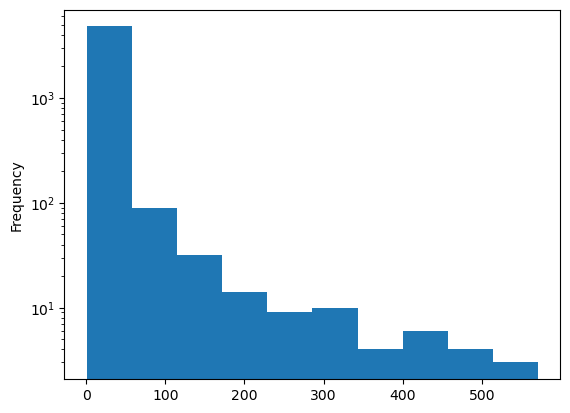

In [35]:
core_with_rating.publisher = core_with_rating.publisher.str.split(",")
core_with_rating.explode("publisher").groupby("publisher").count().iloc[:,1].rename("#games").plot(kind="hist",logy=True)

In [36]:
is_team = core_with_rating.designer.str.split(",").map(len,na_action="ignore") > 1
team_designer = core_with_rating[is_team]
single_designer = core_with_rating[~is_team]
team_designer[response].describe() - single_designer[response].describe()

,num_votes,avg_rating,stddev_rating,bayes_rating
count,-7843.000000,-7843.000000,-7843.000000,-7843.000000
mean,75.961834,0.113950,0.034716,0.052617
std,-953.057085,0.023425,0.010636,0.049522
min,0.000000,0.627420,-0.002100,-0.026130
25%,9.000000,0.089473,0.027475,0.003922
50%,35.000000,0.124110,0.037260,0.018575
75%,168.250000,0.151640,0.040763,0.093015
max,-33967.000000,-0.051930,0.138870,0.046240


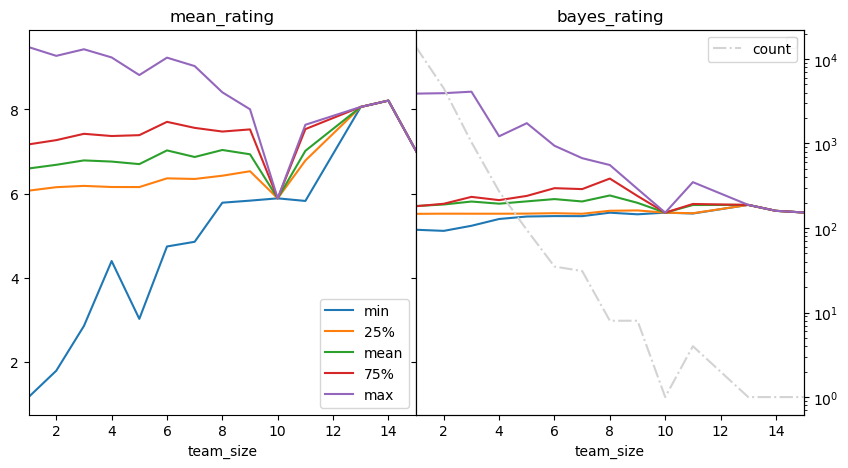

In [37]:
cdf = core_with_rating
cdf["team_size"] = cdf.designer.str.split(",").map(len,na_action="ignore")
#cdf.groupby("team_size")["avg_rating"].describe().plot(y=["min","25%","mean","75%","max"],xlim=(1,15))
#cdf.groupby("team_size")["bayes_rating"].describe().plot(y=["min","25%","mean","75%","max"],xlim=(1,15),secondary_y="count")

fig, ax1 = plt.subplots(1,2,figsize=(10,5),sharey=True,squeeze=True,gridspec_kw=dict(wspace=0))
cdf.groupby("team_size")["avg_rating"].describe().plot(ax=ax1[0],y=["min","25%","mean","75%","max"],xlim=(1,15),title="mean_rating")
#plt.gca().set_prop_cycle(None)
ax2 = ax1[1].twinx()
cdf.groupby("team_size")["avg_rating"].describe().plot(ax=ax2, y="count", color='lightgrey',logy=True,style="-.")
#cdf.groupby("team_size")["bayes_rating"].describe().plot(y=["min","25%","mean","75%","max"],xlim=(1,15),secondary_y="count")
cdf.groupby("team_size")["bayes_rating"].describe().plot(ax=ax1[1],y=["min","25%","mean","75%","max"],xlim=(1,15),title="bayes_rating")
ax1[1].legend([])

In [28]:
cdf.groupby("team_size")["avg_rating"].describe()

,count,mean,std,min,25%,50%,75%,max
team_size,,,,,,,,
1,13823.0,6.596280,0.855972,1.15783,6.068750,6.605870,7.169700,9.48462
2,4486.0,6.683973,0.856936,1.78525,6.151523,6.692575,7.270817,9.27593
3,1035.0,6.788481,0.942410,2.85111,6.182045,6.824270,7.421350,9.43269
4,271.0,6.760775,0.920614,4.39461,6.155865,6.762960,7.368555,9.23819
5,95.0,6.700175,0.910696,3.01842,6.154230,6.691540,7.389305,8.81915
6,35.0,7.026597,1.036851,4.74082,6.361790,7.057900,7.705905,9.23333
7,31.0,6.869849,1.044065,4.85256,6.346960,7.014860,7.562360,9.03279
8,8.0,7.036576,0.920911,5.78232,6.424232,7.096400,7.475118,8.40839
9,8.0,6.934122,0.769438,5.83152,6.531010,6.831180,7.526060,8.00464


,bgg_id,year,designer,event_type,name,mechanic,complexity,game_type,publisher,min_players,...,artist,compilation,compilation_of,implementation,integration,num_votes,avg_rating,stddev_rating,bayes_rating,team_size
0,299,1990.0,1668,event,De Bellis Antiquitatis: Quick Play Wargame Rul...,"2001,2072,2975,2949,2011,2070",2.8000,4664,"257,938,44625",2.0,...,"1333,24542",NaN,NaN,NaN,NaN,686.0,7.29609,1.64853,5.93811,3
0,299,1990.0,2014,event,De Bellis Antiquitatis: Quick Play Wargame Rul...,"2001,2072,2975,2949,2011,2070",2.8000,4664,"257,938,44625",2.0,...,"1333,24542",NaN,NaN,NaN,NaN,686.0,7.29609,1.64853,5.93811,3
0,299,1990.0,1669,event,De Bellis Antiquitatis: Quick Play Wargame Rul...,"2001,2072,2975,2949,2011,2070",2.8000,4664,"257,938,44625",2.0,...,"1333,24542",NaN,NaN,NaN,NaN,686.0,7.29609,1.64853,5.93811,3
1,8406,1990.0,1747,event,Operation Solace,"2072,2850,2676,2026,2947,2016,2070,2897",3.2000,4664,"3133,189",2.0,...,NaN,NaN,NaN,NaN,NaN,48.0,5.95521,1.31716,5.50717,3
1,8406,1990.0,2868,event,Operation Solace,"2072,2850,2676,2026,2947,2016,2070,2897",3.2000,4664,"3133,189",2.0,...,NaN,NaN,NaN,NaN,NaN,48.0,5.95521,1.31716,5.50717,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19799,332804,2023.0,34802,event,Cantaloop: Book 3 – Against All Odds,"2023,3002,2028,2822,2819,2027",NaN,NaN,234,1.0,...,"132194,11507",NaN,NaN,NaN,NaN,54.0,7.63148,1.25828,5.55754,2
19800,364277,2023.0,79512,event,Stonks,"2005,2009",1.8333,NaN,"42325,35035",2.0,...,104561,NaN,NaN,NaN,NaN,45.0,7.59356,1.72535,5.53414,2
19800,364277,2023.0,14650,event,Stonks,"2005,2009",1.8333,NaN,"42325,35035",2.0,...,104561,NaN,NaN,NaN,NaN,45.0,7.59356,1.72535,5.53414,2
19801,282775,2023.0,118938,event,The Warp,"2080,2072,2040,2011,2020,2819,2015",3.3077,5497,"25996,42144,5380",1.0,...,72115,NaN,NaN,NaN,NaN,179.0,8.37989,1.38852,5.66547,1


In [30]:
core_with_rating.avg_rating.describe()

count    19803.000000
mean         6.630690
std          0.864674
min          1.157830
25%          6.093515
50%          6.641630
75%          7.207085
max          9.484620
Name: avg_rating, dtype: float64

In [31]:
core_with_rating.team_size.max()

26

In [32]:
from math import comb
teamsize_max = 26
print(f"size of risk set for team up to {teamsize_max}\n{sum([comb(len(by_id.designer.unique()),n) for n in range(1,teamsize_max)])}")
print()
teamsize_max = 4
print(f"size of risk set for team up to {teamsize_max}\n{sum([comb(len(by_id.designer.unique()),n) for n in range(1,teamsize_max)])}")


size of risk set for team up to 26
457805171139081759201521162220973895268409652159714048648505651876474714495

size of risk set for team up to 4
160494474375


In [ ]:
core_with_rating.team_size.describe()

In [ ]:
by_year = core_with_rating[["bgg_id","year","mechanic"]].copy()
by_year.mechanic = by_year.mechanic.str.split(",").map(set).map(sorted).map(tuple)
by_year = by_year.sort_values("year") # do multiple sample with random ordering per year
by_year.head()

In [ ]:
#step 1
configurations = by_year.mechanic.unique()
lut = {v:k for k,v in enumerate(configurations)}
dummies = pd.Series(configurations).explode().str.get_dummies().groupby(level=0).sum()
dummies 

In [ ]:
#step 2: euclidean distances between each pair of configurations
from sklearn.metrics import pairwise_distances
dist_matrix = pd.DataFrame(pairwise_distances(dummies),index=dummies.index,columns=dummies.index)
dist_matrix = dist_matrix/dist_matrix.max()
dist_matrix

In [ ]:
#step 3: novelty = average of distances of the focal game to all of the games that existed at that time

#questions that arise: level of detail => yearly => creates ambiguity => check stability
# todo check
from tqdm import tqdm
import numpy as np

by_year["configuration_id"] = by_year.mechanic.map(lambda x :lut[x])
permutations = 100
novelty = pd.DataFrame()
for _ in range(permutations):
    permutation = by_year.groupby("year").transform(np.random.permutation).reset_index(drop=True)
    i = 0
    for ix in tqdm(permutation.index):
        if ix == 0:
            permutation["novelty"] = pd.NA
        else:
            focal = permutation.loc[ix,"configuration_id"]
            previous = permutation.loc[:ix-1,"configuration_id"]
            permutation.loc[ix,"novelty"] = dist_matrix.to_numpy()[previous,focal].mean()
    novelty = pd.concat((novelty,permutation.set_index("bgg_id")[["novelty"]]),axis=1)

In [ ]:
novelty_scores = pd.concat((novelty.mean(axis=1).rename("novelty_avg"),novelty.std(axis=1).rename("novelty_std")),axis=1)
novelty_scores.convert_dtypes().describe()
df = novelty_scores[["novelty_avg"]]
novelty_scores_normalized = (df-df.min())/(df.max()-df.min()).convert_dtypes()

In [ ]:
by_id = by_id.set_index("bgg_id").join(novelty_scores_normalized).reset_index()

In [ ]:
add_actor = by_id.groupby("designer")["year"].min().reset_index()
add_actor["event_type"]= "add_actor"
add_actor["bgg_id"]= 0
add_actor

In [ ]:
out = pd.concat([by_id,add_actor]).sort_values(["year","event_type"],ascending=(True,True)).reset_index(drop=True).convert_dtypes()
out = out[core+response+["event_type"]].drop(columns=["mechanic"])
out = out.drop(columns=["name"])
out.year = out.year.astype("str")
out.bgg_id = out.bgg_id.astype("str")
out = out.fillna(0)
import csv
out = out.convert_dtypes()
out.to_csv("../bgg_min.csv",index=False,quoting=csv.QUOTE_NONNUMERIC)

In [ ]:
teamsize_counts = core.designer.map(len).value_counts().reset_index().sort_index(ascending=False)
teamsize_counts["cumsum"]=teamsize_counts["count"].cumsum()
teamsize_counts

/opt/homebrew/Caskroom/miniforge/base/envs/scrapy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/scrapy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/scrapy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/scrapy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_c

<Axes: xlabel='year'>

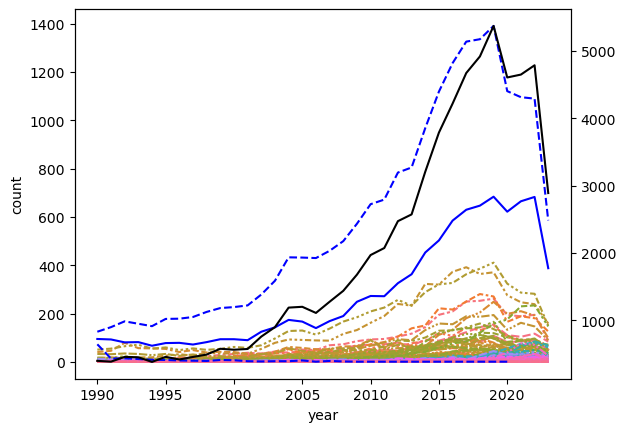

In [ ]:
import seaborn as sns
df = pd.get_dummies(mechanics_by_year.explode("mechanic")[["year","mechanic"]].set_index("year").mechanic).astype(int).groupby(level=0).sum()
ax = sns.lineplot(df,legend=False,)
sns.lineplot(mechanics_by_year.explode("mechanic").drop_duplicates(subset="mechanic").year.value_counts(),c="b",linestyle="dashed")
sns.lineplot(mechanics_by_year.drop_duplicates(subset="mechanic").year.value_counts(),c="b")
sns.lineplot(mechanics_by_year.year.value_counts(),legend=False,ax=ax,c="b",linestyle='dashed')
ax2 = ax.twinx()
sns.lineplot(df.sum(axis=1),legend=False,ax=ax2,c="black")
#plt.yscale('log')

/opt/homebrew/Caskroom/miniforge/base/envs/scrapy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/scrapy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/scrapy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/scrapy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_c

Text(0.5, 1.0, 'ratings by mechanic')

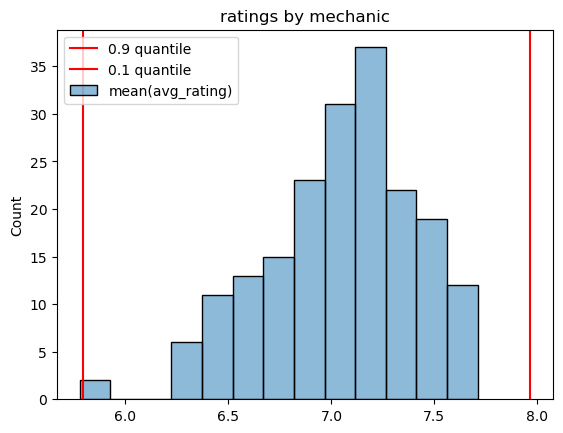

In [ ]:
data = eventlist[eventlist.event_type=="event"][["mechanic","avg_rating"]].explode("mechanic").sort_values("mechanic")
axes = sns.histplot(data.groupby("mechanic").mean(),label="mean(avg_rating)")
axes.axvline(data.avg_rating.quantile(0.9),c="r",label="0.9 quantile")
axes.axvline(data.avg_rating.quantile(0.1),c="r",label="0.1 quantile")
axes.legend()
plt.title("ratings by mechanic")